# Decision Tree - Viners kvalitet  
*Inlämningsuppgift 1 - Maskininlärning och Deep Learning*  
*Deadline: 29:e April 2025*

---

## 1.1 Godkänt

- Träna en random forest
- Vad får modellen för testscore?
- Hur många träd finns det i skogen?
- Vilka attribut har störst påverkan?
- Vilka klasser är det den modellen har störst problem med att klassificera rätt? Varför är det problem med de klasserna?

---

## 1.2 Väl Godkänt

- Bygg en egen random forest genom att träna flera decision trees

---




In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from collections import Counter

In [4]:
df = pd.read_csv("WineQT.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.shape

(1143, 13)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df_no_id = df.drop("Id", axis=1)

In [9]:
df_no_id.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df_no_id.shape

(1143, 12)

<Axes: >

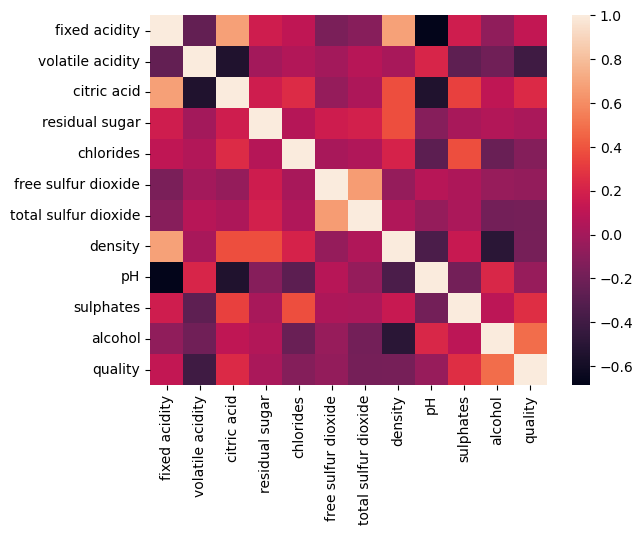

In [13]:
sns.heatmap(df_no_id.corr())

In [20]:
X = df_no_id.drop("quality", axis=1)
y = df_no_id["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_scaled, y_train)

clf.score(X_test_scaled, y_test)

0.6783216783216783

## Vad får modellen för testscore?

In [23]:
accuracy = clf.score(X_test_scaled, y_test)

print(f"Modellens score: {accuracy}%")

Modellens score: 0.6783216783216783%


## Hur många träd finns det i skogen?:

In [26]:
trees_in_forest = len(clf.estimators_)

print(f"Träd i skogen: {trees_in_forest}")

Träd i skogen: 100


## Vilka attribut har störst påverkan?

In [29]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

alcohol                 0.142274
sulphates               0.115832
volatile acidity        0.114315
total sulfur dioxide    0.097051
density                 0.090631
chlorides               0.080220
citric acid             0.078945
fixed acidity           0.074561
pH                      0.071309
residual sugar          0.068301
free sulfur dioxide     0.066562
dtype: float64


## Vilka klasser är det den modellen har störst problem med att klassificera rätt? Varför är det problem med de klasserna?

In [32]:
y_pred = clf.predict(X_test_scaled)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))


[[ 0  5  2  0  0]
 [ 0 90 29  2  0]
 [ 0 34 83  4  0]
 [ 0  0 13 21  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.70      0.74      0.72       121
           6       0.64      0.69      0.66       121
           7       0.78      0.62      0.69        34
           8       0.00      0.00      0.00         3

    accuracy                           0.68       286
   macro avg       0.42      0.41      0.41       286
weighted avg       0.66      0.68      0.67       286



C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Modellen har svårast att klassificera vinerna under kvalitet: 3, 4 och 8. Vi undersöker nedanför varför.

In [41]:
print(pd.Series(y_train).value_counts())

quality
5    362
6    341
7    109
4     26
8     13
3      6
Name: count, dtype: int64


In [42]:
print(pd.Series(y_test).value_counts())

quality
5    121
6    121
7     34
4      7
8      3
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

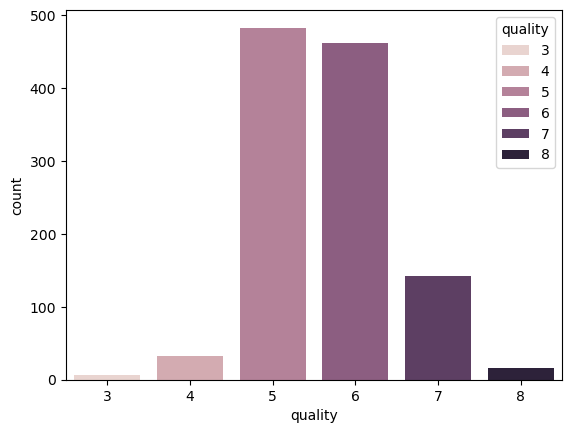

In [43]:
sns.countplot(x=df_no_id["quality"], hue=df_no_id["quality"])

## Vi kan direkt se att det är en extrem obalans i mängden data när det kommer till vinerna i klass 3, 4 och 8. Det är så pass litet att det i princip drunknar i resten av datan och inte påverkar. 

## 1.2 Väl Godkänt

## Bygg din egen random forest genom att träna flera decision trees

In [82]:
class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=None):
        self.n_trees = n_trees # Hur många träd som ska vara i skogen 
        self.max_depth = max_depth # hur djupt varje decision tree ska vara, default=ingen begränsning
        self.trees = [] # lista som innehåller alla träd
    
    def bootstrap_sample(self, X, y): # Tar in input data och labels(x och y)
        n_samples = X.shape[0] # Hur mågna rader samples 
        indices = np.random.choice(n_samples, n_samples, replace=True) # Slumpar data till träden
        return X.iloc[indices], y.iloc[indices] # returnerar raderna från X och y 
        # Kort sagt skapar denna ett nytt mini dataset för varje träd
    
    def fit(self, X, y): 
        self.trees = [] # Nollställer listan inför varje fitting
        for _ in range(self.n_trees): # loopar genom varje träd som ska vara i skogen
            tree = DecisionTreeClassifier(max_depth=self.max_depth) # SKapar en decision tree 
            X_sample, y_sample = self.bootstrap_sample(X, y) # skapar ett bootstrap sample av datan
            tree.fit(X_sample, y_sample) # tränar trädet på den samplade bootstrap-datan
            self.trees.append(tree) # Lägger till trädet i vår egna skog
    
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees]) # kör varje träd på indata: X
        majority_preds = []  # initierar och nollar preds
        for preds in tree_preds.T: # loopar så att varje träd gör egna förutsägelser, T byter plats på rader och kolumner. 
            majority_vote = Counter(preds).most_common(1)[0][0] # Räknar hur många gånger varje klass röstades fram och tar ut den vanligaste klassen
            majority_preds.append(majority_vote) # Appendar resultatet i listan majority_preds
        return np.array(majority_preds) # returnerar alla majoritetsröster som en numpy array
        # Kort sagt: Alla träd röstar på sin gissning och majoriteten bestämmer slutsatsen. 

In [83]:
forest = MyRandomForest(n_trees=10, max_depth=5)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [84]:
print(len(forest.trees))

10


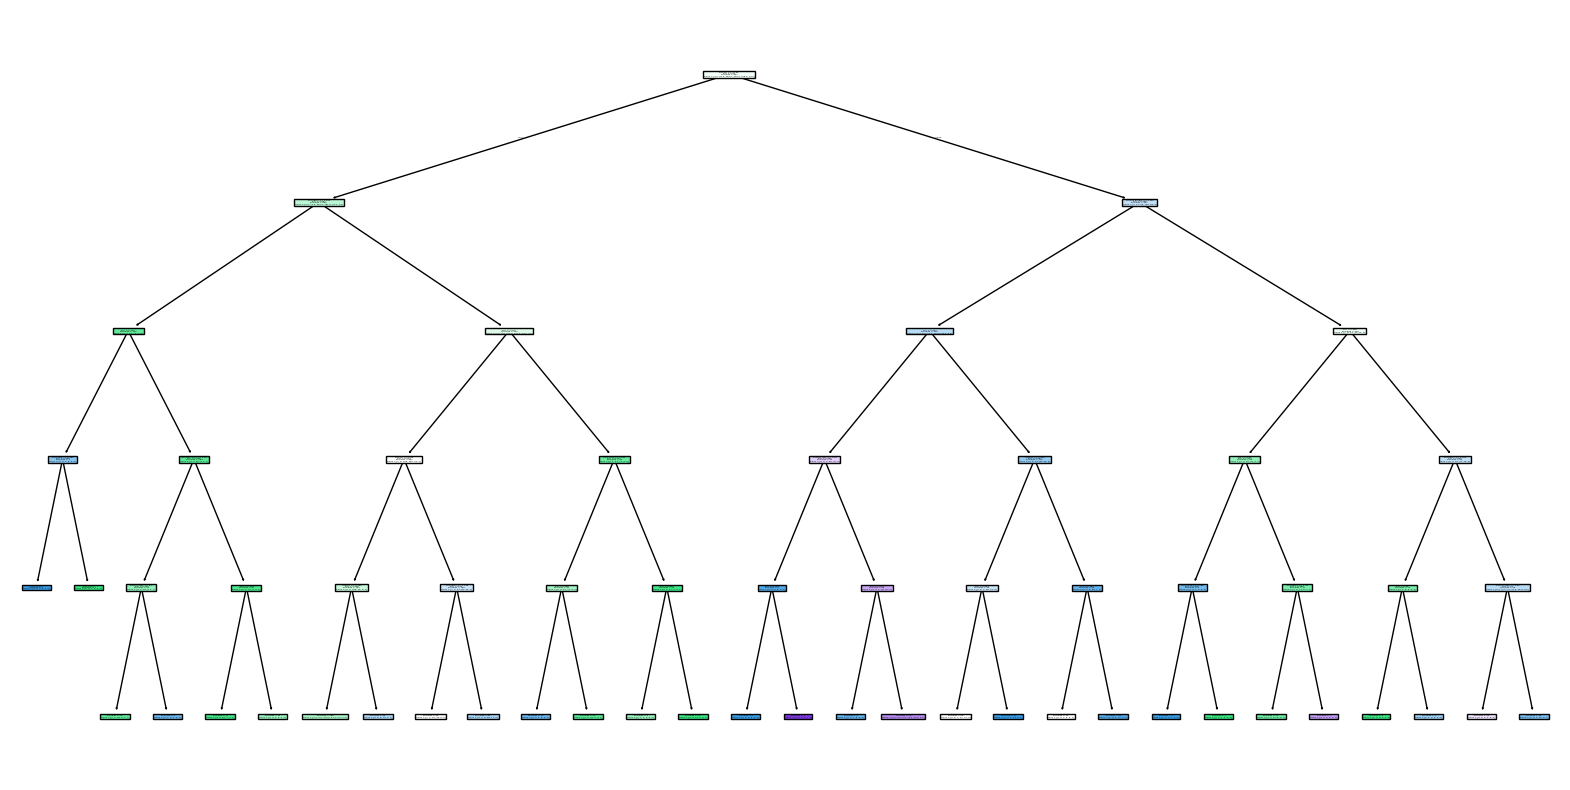

In [85]:
plt.figure(figsize=(20,10))
tree.plot_tree(forest.trees[0], filled=True, feature_names=X_train.columns)
plt.show()

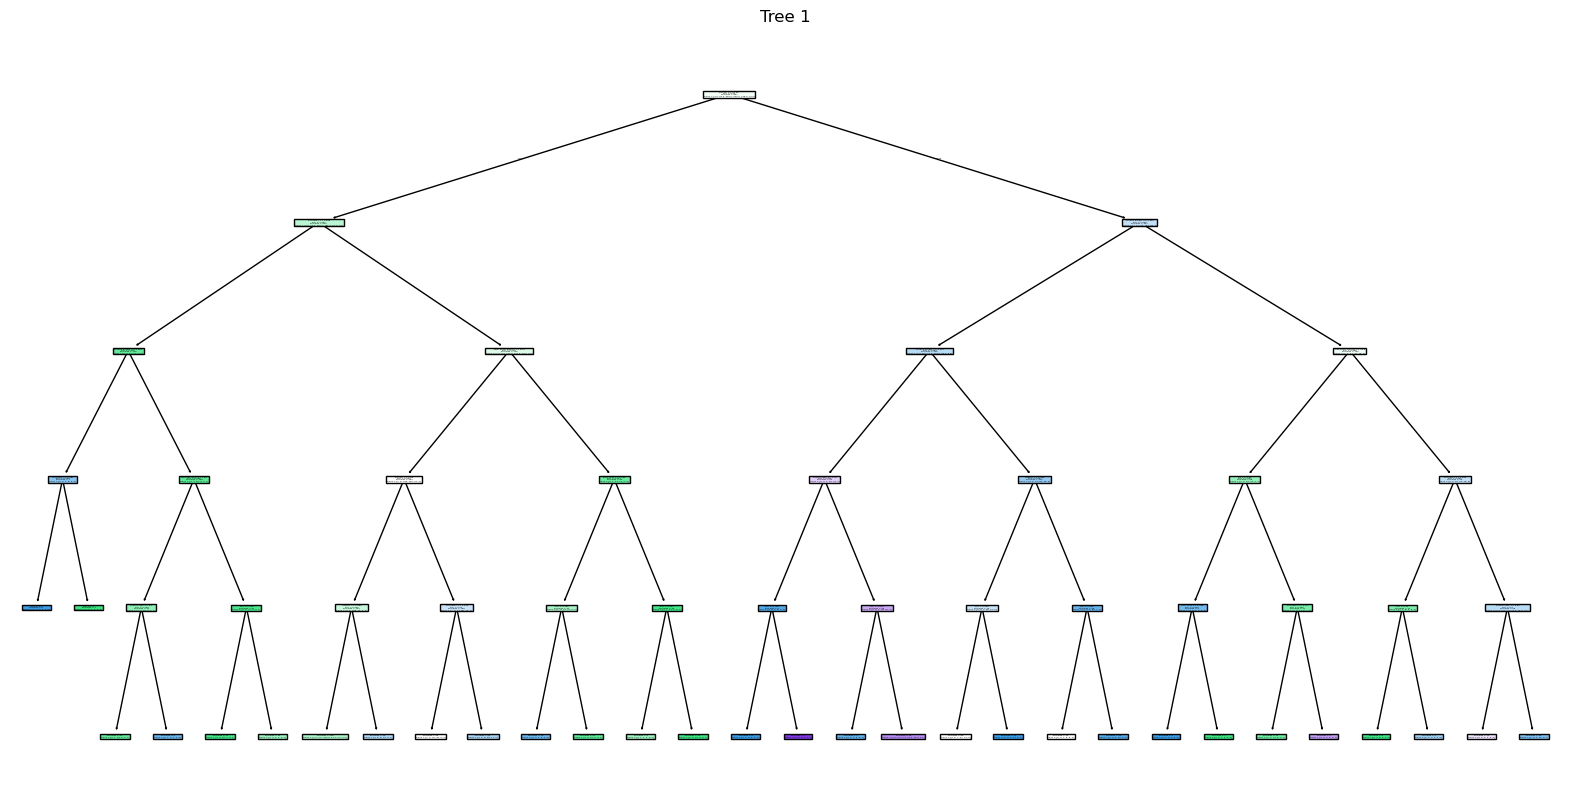

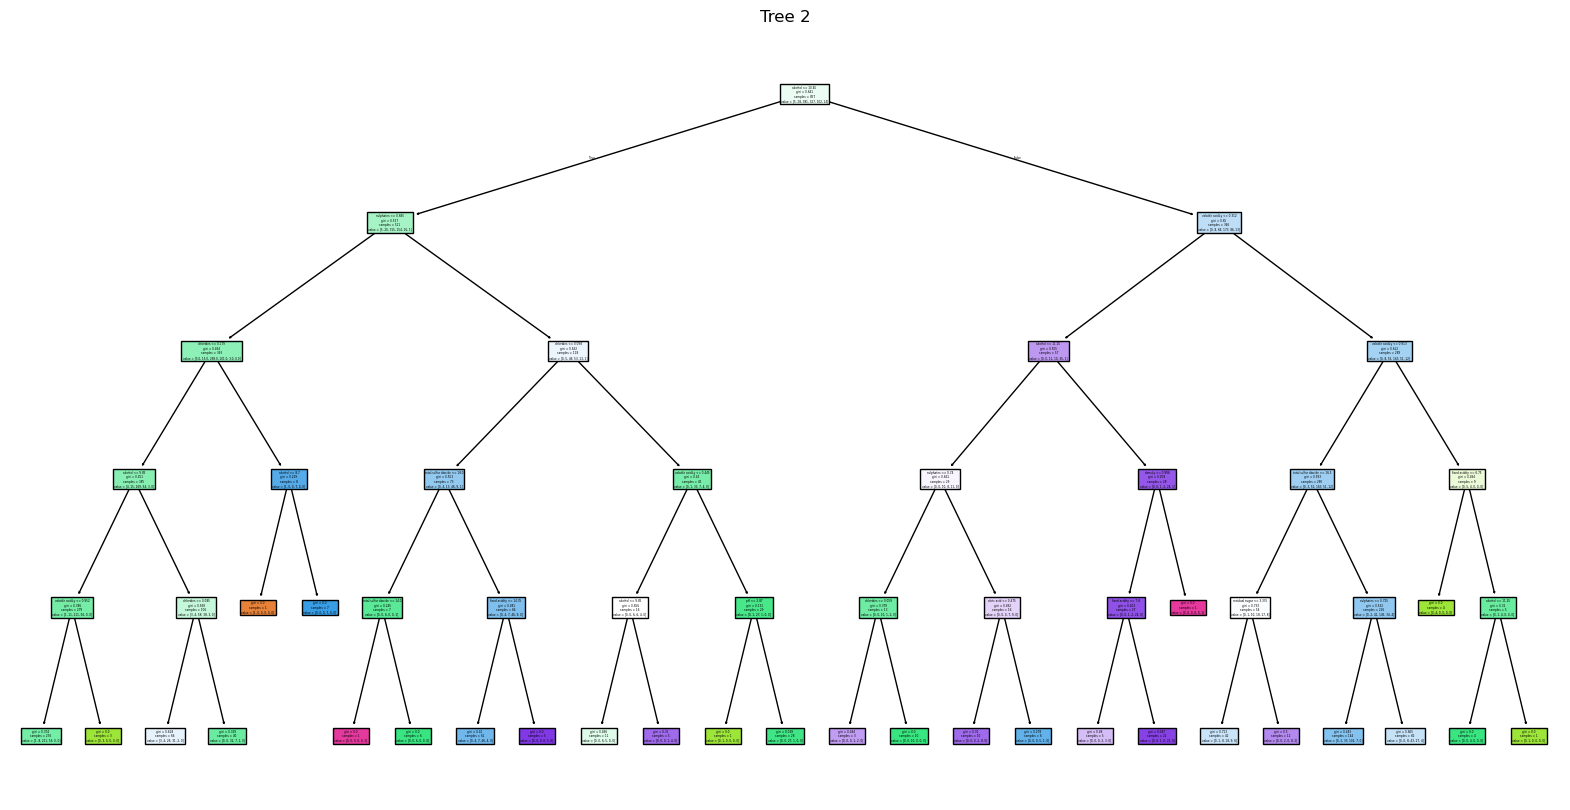

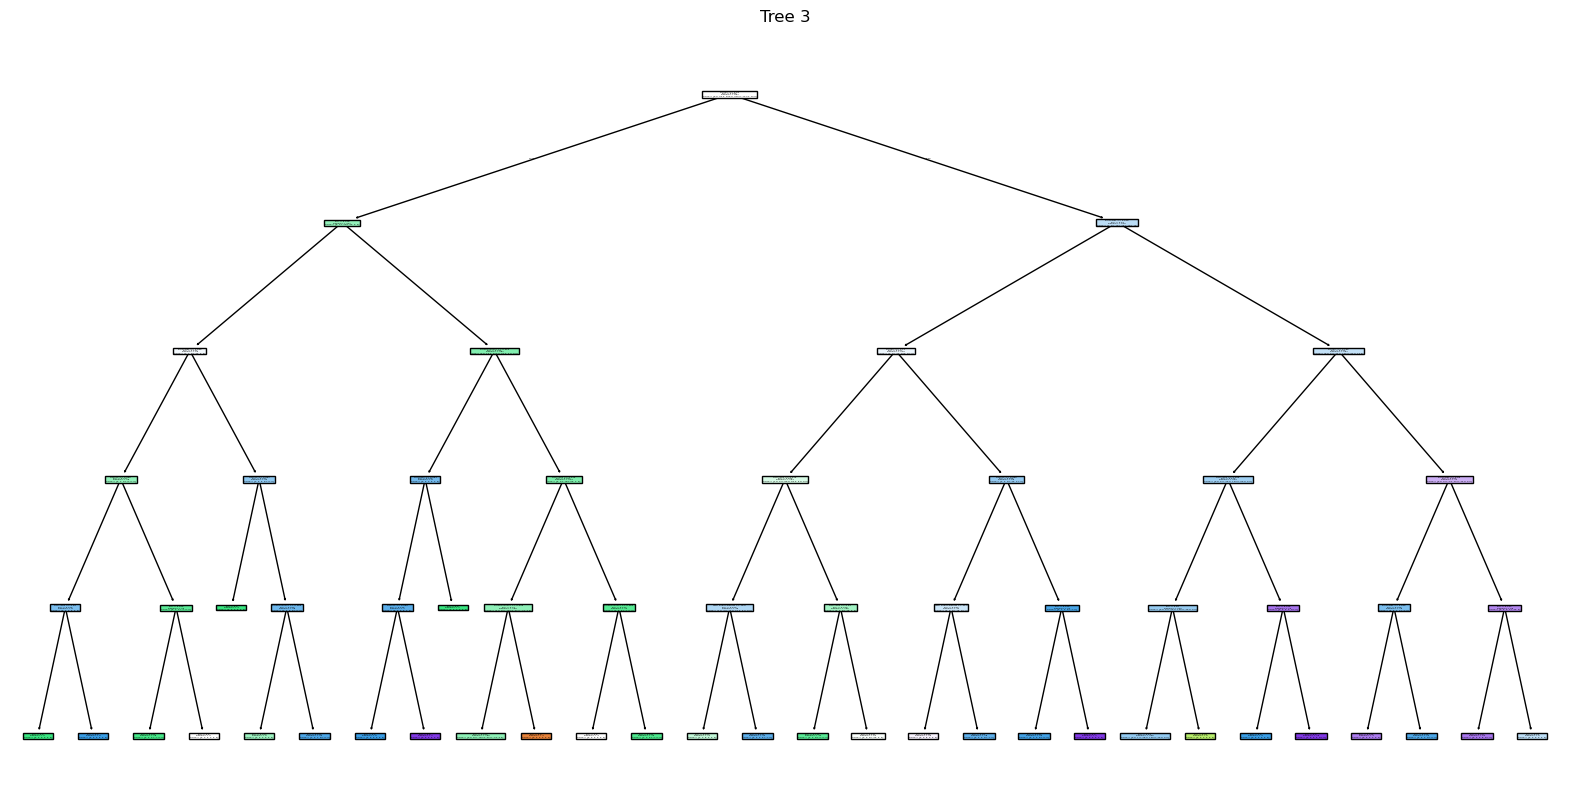

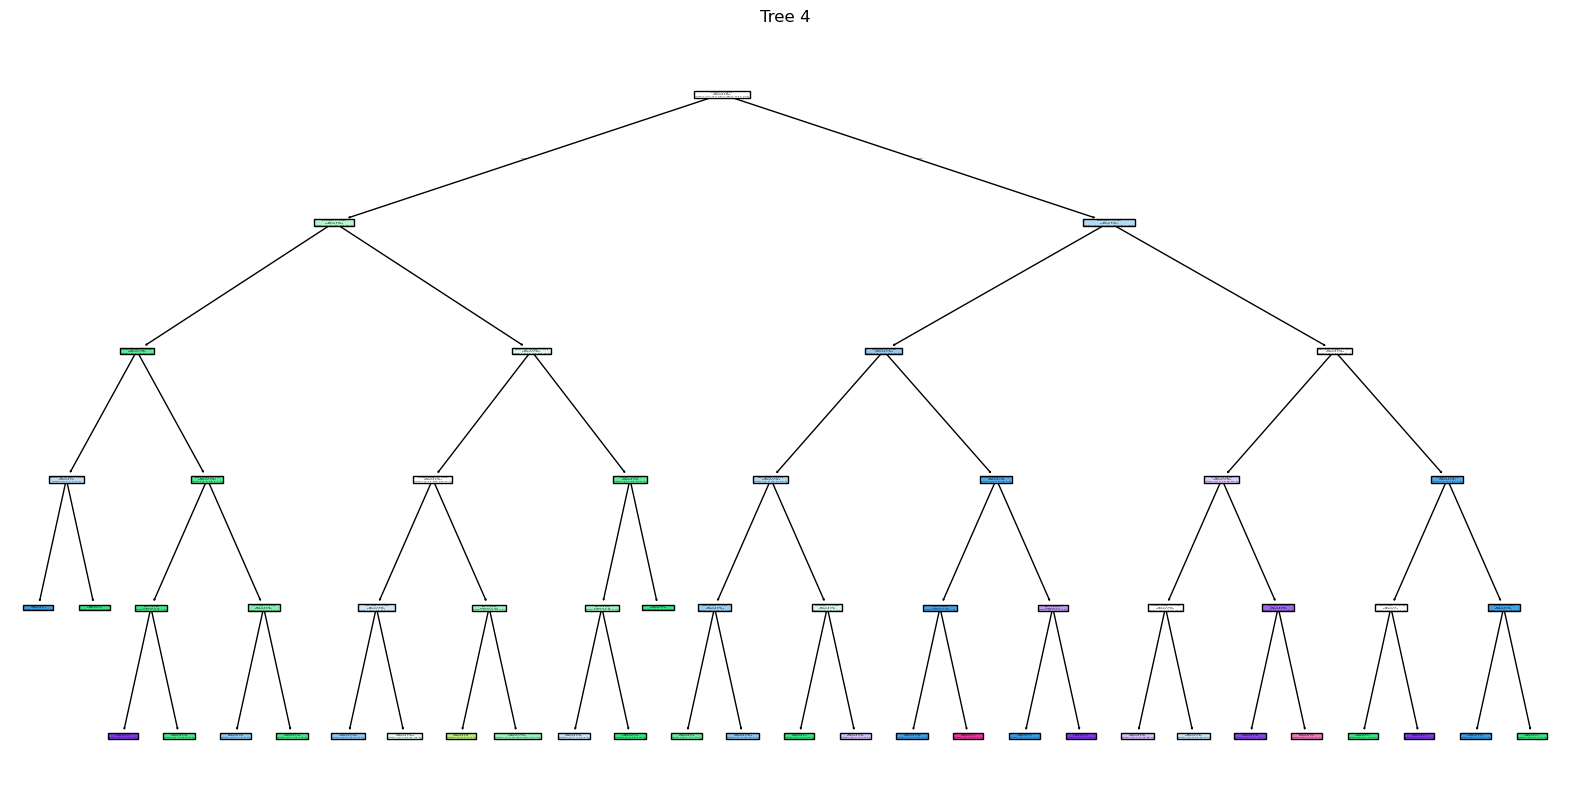

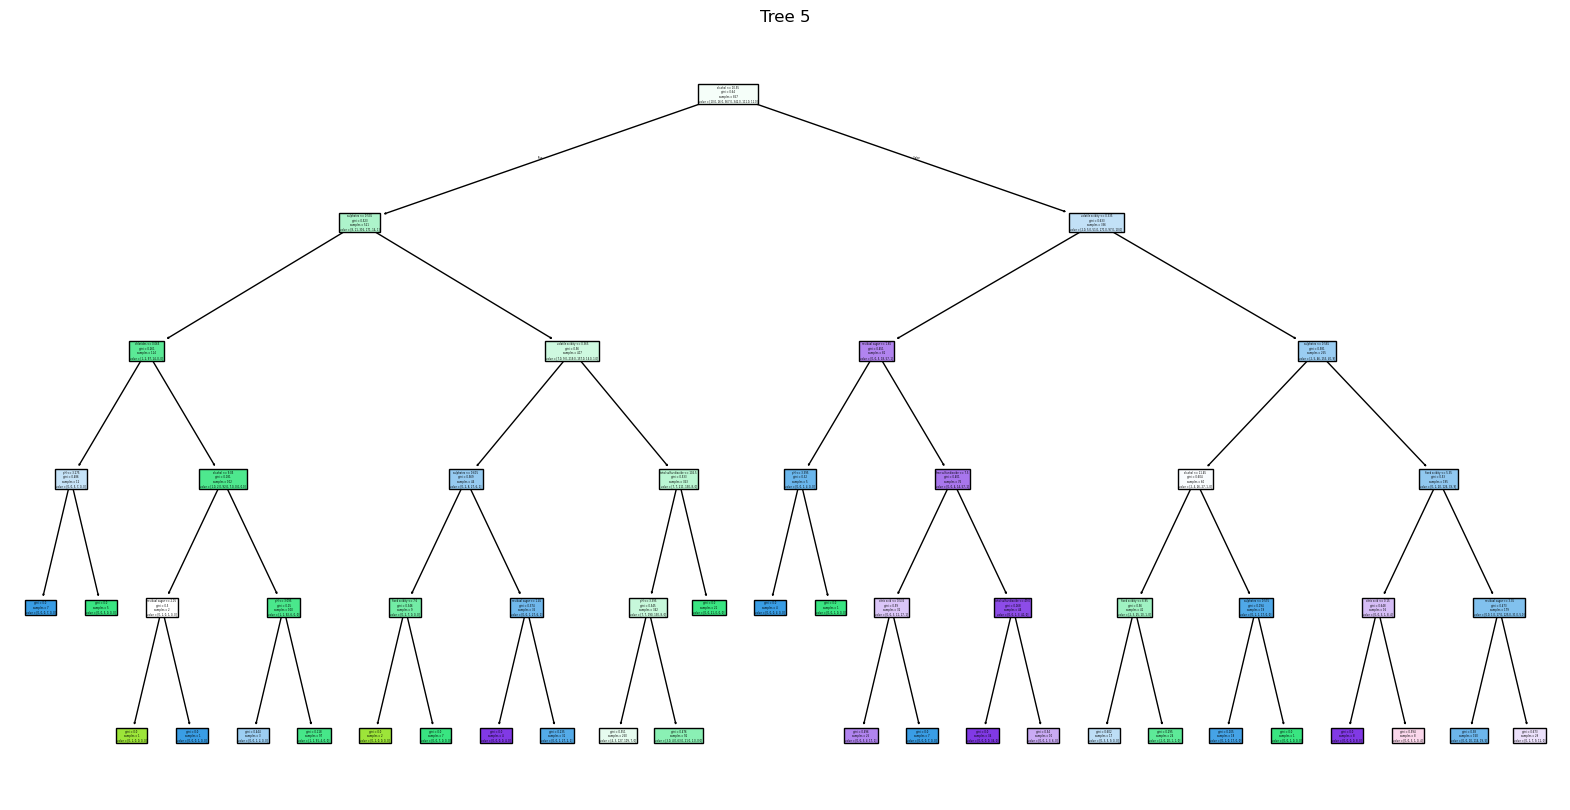

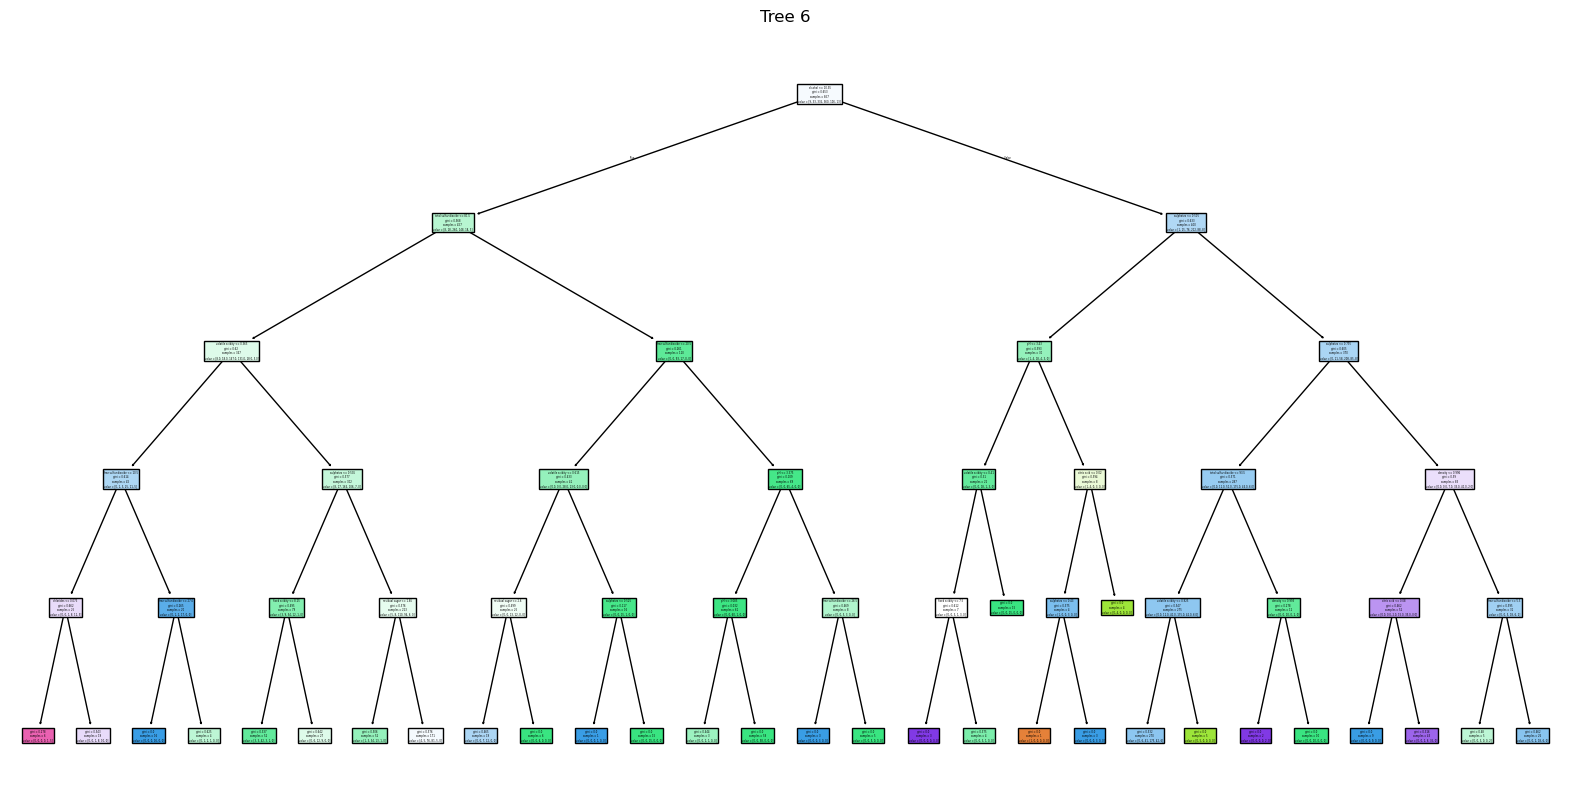

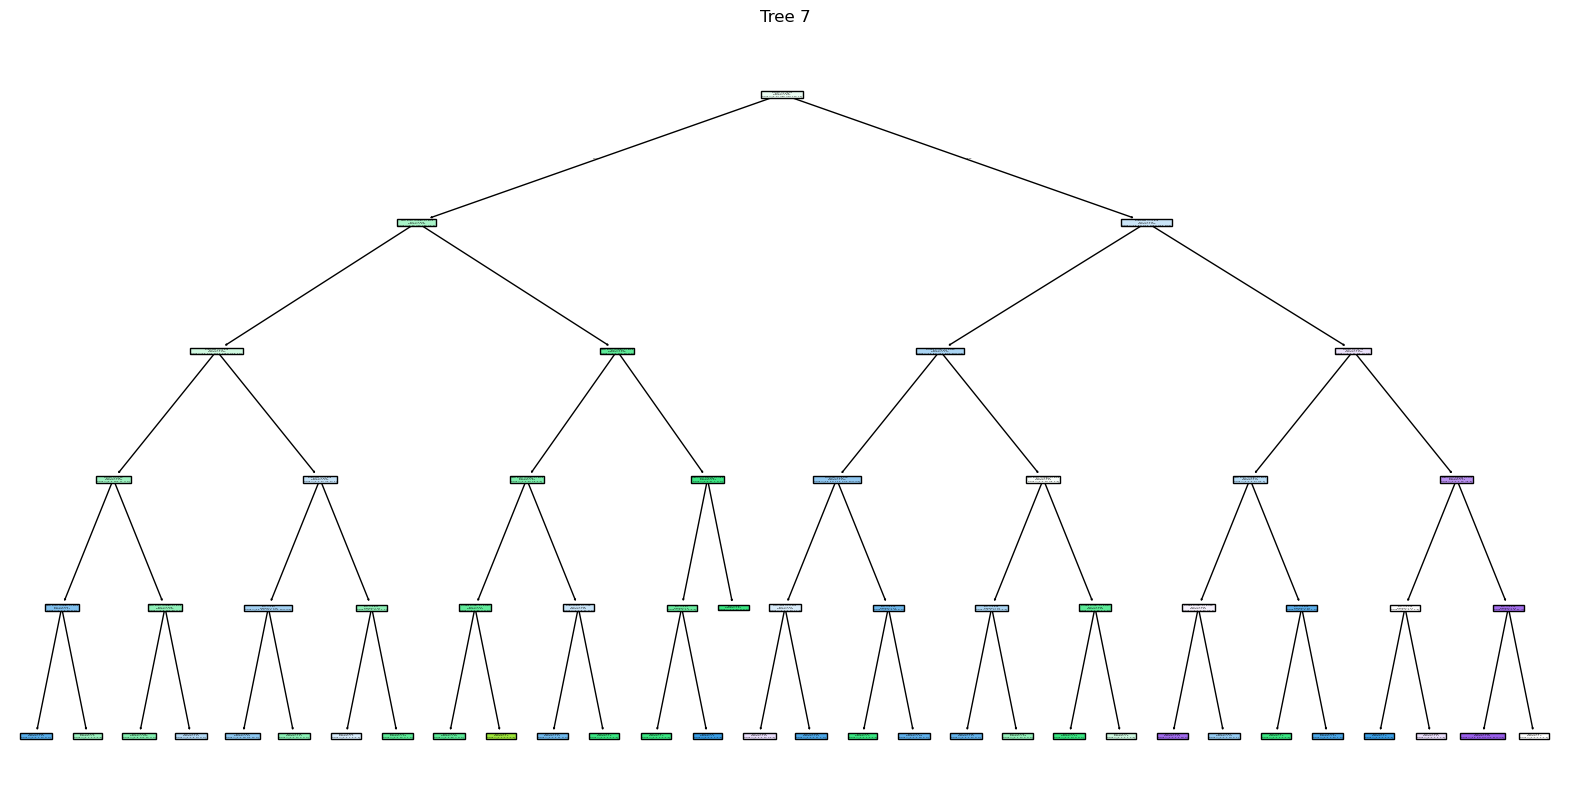

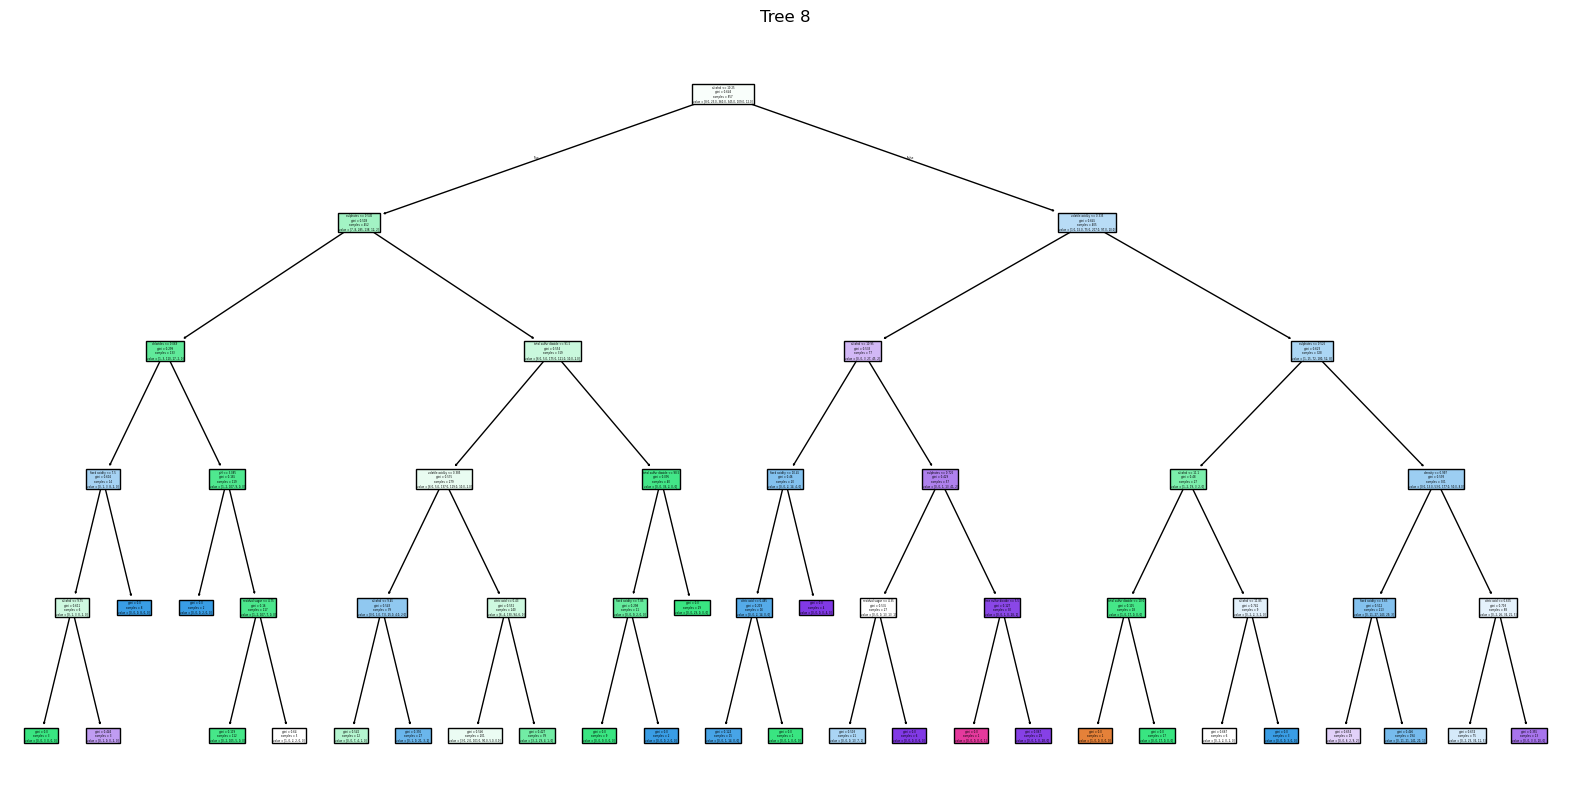

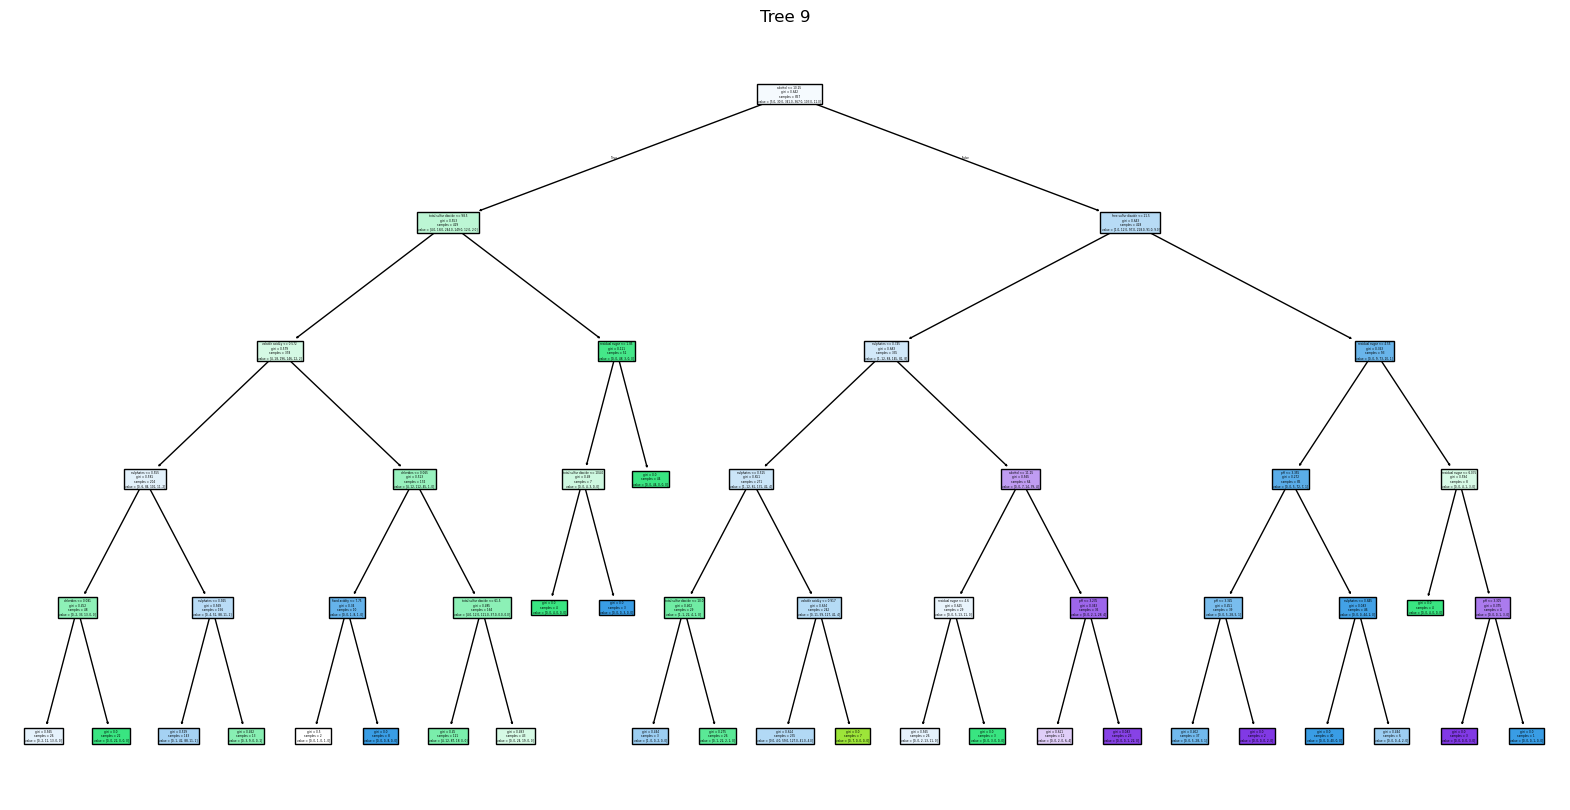

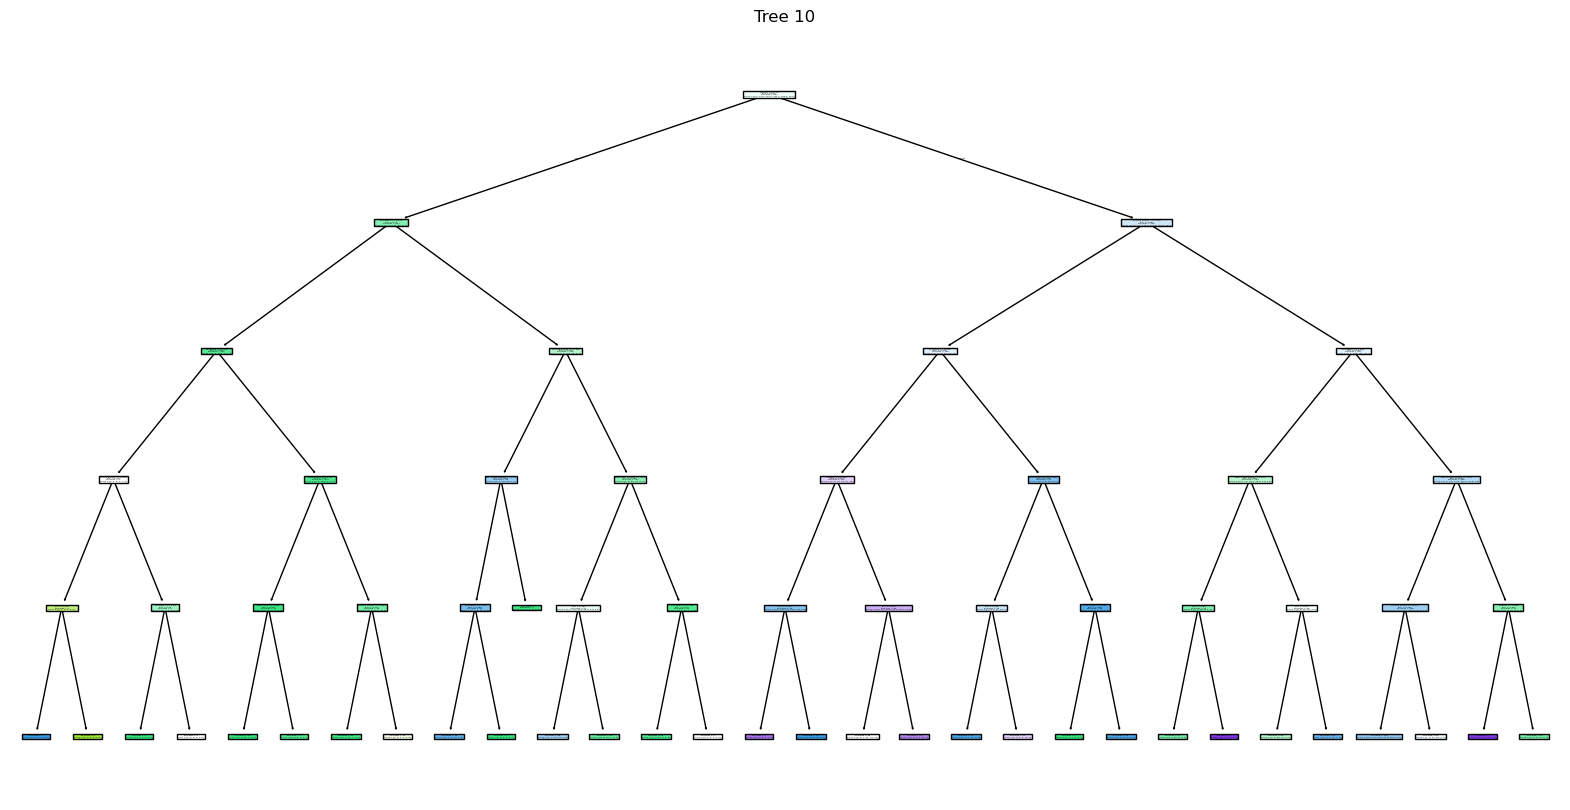

In [90]:
# Visar alla träd i skogen
for i, t in enumerate(forest.trees): 
    plt.figure(figsize=(20,10))
    tree.plot_tree(t, filled=True, feature_names=X_train.columns)
    plt.title(f"Tree {i+1}")
    plt.show()


In [87]:
y_pred = forest.predict(X_test)

In [91]:
# Resultat med vår egna skog
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.6258741258741258


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.67      0.78      0.72       121
           6       0.58      0.63      0.60       121
           7       0.64      0.26      0.38        34
           8       0.00      0.00      0.00         3

    accuracy                           0.63       286
   macro avg       0.38      0.33      0.34       286
weighted avg       0.60      0.63      0.60       286



C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\augus\Desktop\Code\School\MLprojekt\inl1\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif